**Задание 1.** Загрузите набор данных `cardiovascular_disease.csv`. Описание данной задачи приведено в приложенном pdf-файле. Проведите первичный анализ данных. Возраст пациентов указан в днях. Создайте вместо него новый признак "возраст в годах", а также с помощью One-hot-encoding преобразуйте признаки `cholesterol` и `gluc` (можно воспользоваться функцией `pandas.get_dummmies`).

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [2]:
df=pd.read_csv('cardiovascular_disease.csv')
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
99997,16035,2,176,75.0,120,80,3,1,0,0,1,1
99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df['age_year']=(df.age / 365.25).astype('int')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


In [4]:
df[['1c','2c','3c']]=pd.get_dummies(df['cholesterol'])
df[['1g','2g','3g']]=pd.get_dummies(df['gluc'])
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,1c,2c,3c,1g,2g,3g
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,1,0,0,1,0,0


**Задание 2.** Разбейте выборку на обучающую и контрольную в соотношении 70%/30% (`sklearn.model_selection.train_test_split`).

In [5]:
X=df[['age_year','gender','height','weight','ap_hi','ap_lo','smoke','alco','active','1c','2c','3c','1g','2g','3g']].values
y=df.cardio

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Задание 3.** Обучите на выборке `(X_train, y_train)` дерево решений глубины 3 (`max_depth=3`, не забудьте указать `random_state`). Визуализируйте дерево с помошью `sklearn.tree.export_graphviz`.  Какие 3 признака задействуются при прогнозе в построенном дереве решений?

In [7]:
clf = DecisionTreeClassifier(max_depth=3,random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [8]:
export_graphviz(clf, out_file='decision_tree.dot', 
                filled=True,
                feature_names=['age_year','gender','height','weight','ap_hi','ap_lo','smoke','alco','active','1c','2c','3c','1g','2g','3g'],
                class_names=['0','1'])

Для визуализации полученного дерева решений воспользуемся сервисом http://www.webgraphviz.com/.

В папке, в которой находится данный ноутбук, появится файл decision_tree.dot. Его можно открыть с помощью текстового редактора, скопировать содержимое, поместить скопированный код в текстовое поле на webgraphviz и нажать на "Generate Graph!

Полученный результат (используются признаки age_year,ap_hi,3c):

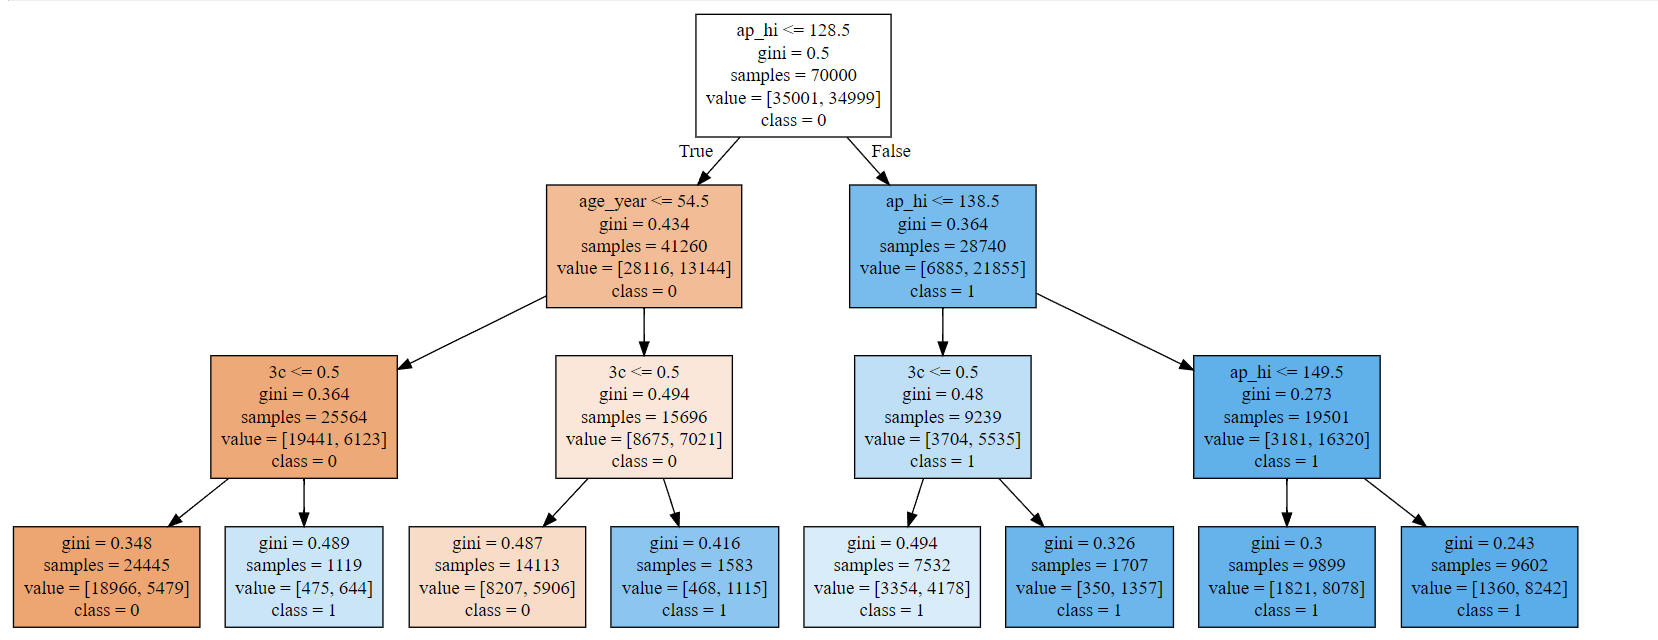

**Задание 4.** Постройте предсказания для тестовой выборки и вычислите долю верных ответов на ней (`sklearn.metrics.accuracy_score`).

In [9]:
y_pred=clf.predict(X_test)

In [10]:
accuracy_score(y_test, y_pred)

0.7291666666666666

**Задание 5.** Воспользуйтесь функцией `sklearn.model_selection.GridSearchCV`, чтобы определить оптимальную глубину решающего дерева методом кросс-валидации по 5 блокам. Зафиксируйте у дерева `random_state`. Рассмотрите значения параметра `max_depth` от 2 до 10. 

In [11]:
par = {'max_depth': list(range(2, 11))}

gscv = GridSearchCV(clf, par, cv=5)
gscv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

**Задание 6.** Отобразите на графике, как меняется accuracy на кросс-валидации в зависимости от значения `max_depth`. Выведите лучшее значение `max_depth`.

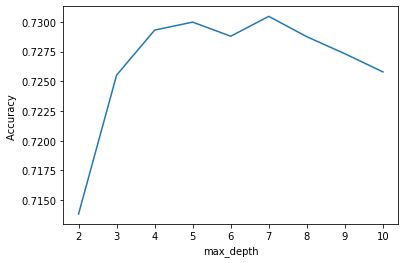

In [12]:
accur = [i for i in gscv.cv_results_['mean_test_score']]
plt.xlabel('max_depth')
plt.ylabel('Accuracy ')
plt.plot(par['max_depth'], accur)

In [13]:
print('best max_depth:',gscv.best_params_['max_depth'],', accuracy:',accuracy_score(y_test, gscv.predict(X_test)))


best max_depth: 7 , accuracy: 0.7346


**Задание 7.**

Создайте бинарные признаки, примерно соответствующие картинке ниже:
- $age \in [45,50), \ldots age \in [60,65) $ (4 признака);
- верхнее артериальное давление: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 признака).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/SCORE2007.png/900px-SCORE2007.png">

In [14]:
df['age[45-50)'] = df['age_year'].apply(lambda x: 1 if x >= 45 and x < 50 else 0)
df['age[50-55)'] = df['age_year'].apply(lambda x: 1 if x >= 50 and x < 55 else 0)
df['age[55-60)'] = df['age_year'].apply(lambda x: 1 if x >= 55 and x < 60 else 0)
df['age[60-65)'] = df['age_year'].apply(lambda x: 1 if x >= 60 and x < 65 else 0)

df['ap_hi[120-140)'] = df['ap_hi'].apply(lambda x: 1 if x >= 120 and x < 140 else 0)
df['ap_hi[140-160)'] = df['ap_hi'].apply(lambda x: 1 if x >= 140 and x < 160 else 0)
df['ap_hi[160-180)'] = df['ap_hi'].apply(lambda x: 1 if x >= 160 and x < 180 else 0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,...,1g,2g,3g,age[45-50),age[50-55),age[55-60),age[60-65),ap_hi[120-140),ap_hi[140-160),ap_hi[160-180)
0,18393,2,168,62.0,110,80,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,18857,1,165,64.0,130,70,3,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
4,17474,1,156,56.0,100,60,1,1,0,0,...,1,0,0,1,0,0,0,0,0,0


**Задание 8.** Построим дерево решений на полученных из шкалы SCORE признаках, а также с признаками `smoke`, `cholesterol` (после OHE)  и `gender`. Значения признака `gender` преобразуйте в 0 и 1.

Постройте дерево решений глубины 3 на **исходной** обучающей выборке. Используйте `DecisionTreeClassifier`. Какой бинарный признак оказался в корне построенного дерева решений?

In [15]:
df['gender']=df['gender'].replace({1:0, 2: 1})
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,...,1g,2g,3g,age[45-50),age[50-55),age[55-60),age[60-65),ap_hi[120-140),ap_hi[140-160),ap_hi[160-180)
0,18393,1,168,62.0,110,80,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,20228,0,156,85.0,140,90,3,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,18857,0,165,64.0,130,70,3,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3,17623,1,169,82.0,150,100,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
4,17474,0,156,56.0,100,60,1,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [16]:
X=df[['age[45-50)','age[50-55)','age[55-60)','age[60-65)','ap_hi[120-140)','ap_hi[140-160)','ap_hi[160-180)','gender','1c','2c','3c','smoke']].values
y=df.cardio

In [17]:
X.shape

(100000, 12)

In [18]:
clf = DecisionTreeClassifier(max_depth=3,random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
export_graphviz(clf, out_file='decision_tree1.dot', 
                filled=True,
                feature_names=['age[45-50)','age[50-55)','age[55-60)','age[60-65)','ap_hi[120-140)','ap_hi[140-160)','ap_hi[160-180)','gender','1c','2c','3c','smoke'],
                class_names=['0','1'])

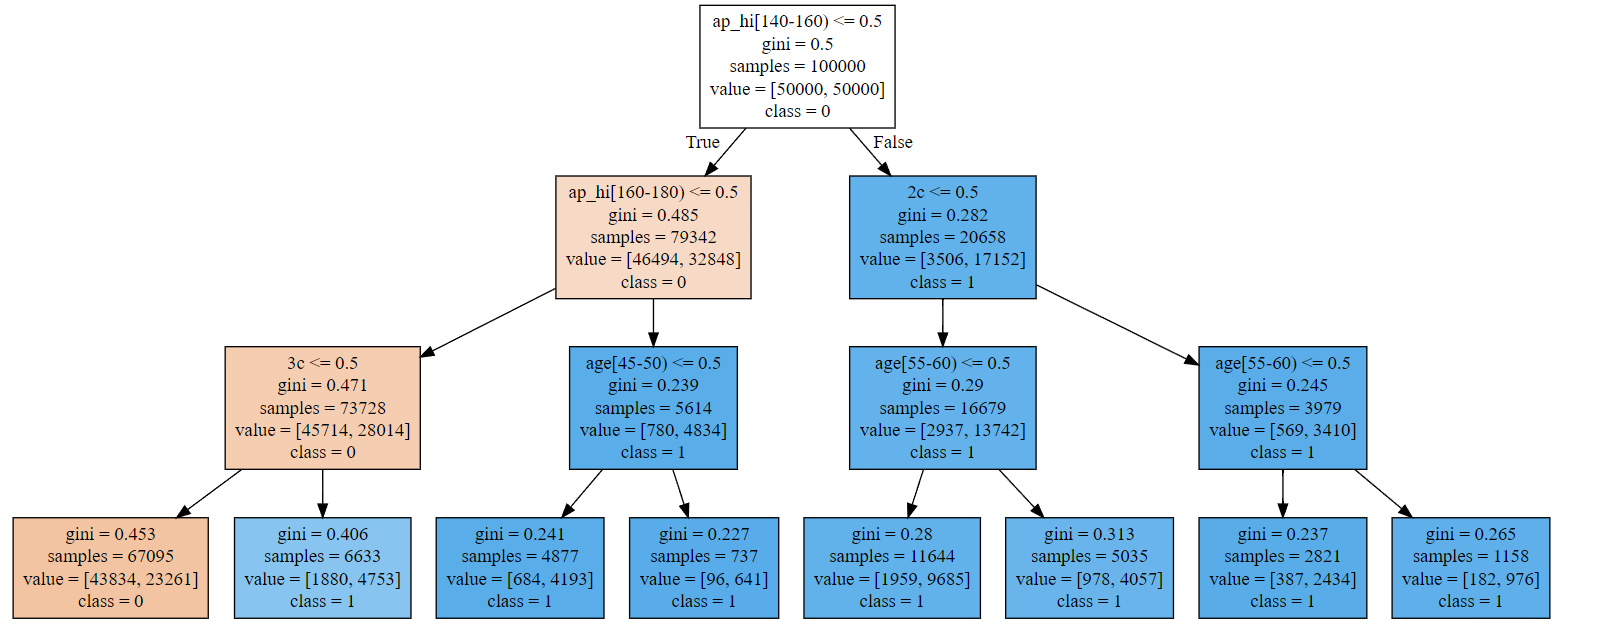

В корне построенного дерева оказался признак ap_hi[140-160)